In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor, OLSInfluence
import pyforest
%matplotlib inline

In [97]:
datasets = pd.read_csv('Housing_price.csv')

In [98]:
datasets.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,one,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,one,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,two,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,one,yes,no,no,no,no,0,no


In [99]:
datasets.tail()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
541,91500.0,4800,3,2,four,yes,yes,no,no,yes,0,no
542,94000.0,6000,3,2,four,yes,no,no,no,yes,0,no
543,103000.0,6000,3,2,four,yes,yes,no,no,yes,1,no
544,105000.0,6000,3,2,two,yes,yes,no,no,yes,1,no
545,105000.0,6000,3,1,two,yes,no,no,no,yes,1,no


In [129]:
columns = ['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea']
for i in range(0, len(columns)):
    for j in range(0, len(datasets[columns[i]])):
        if datasets[columns[i]].iloc[j] == 'yes':
            datasets[columns[i]].iloc[j] = 1
        elif datasets[columns[i]].iloc[j] == 'no':
            datasets[columns[i]].iloc[j] = 0

In [101]:
for i in range(0, len(datasets['stories'])):
    if datasets['stories'].iloc[i] == 'two':
        datasets['stories'].iloc[i] = int(2)
    elif datasets['stories'].iloc[i] == 'one':
        datasets['stories'].iloc[i] = int(1)
    elif datasets['stories'].iloc[i] == 'three':
        datasets['stories'].iloc[i] = int(3)
    elif datasets['stories'].iloc[i] == 'four':
        datasets['stories'].iloc[i] = int(4)

In [102]:

datasets['driveway'] = datasets['driveway'].astype(int)
datasets['recroom'] = datasets['recroom'].astype(int)
datasets['fullbase'] = datasets['fullbase'].astype(int)
datasets['gashw'] = datasets['gashw'].astype(int)
datasets['airco'] = datasets['airco'].astype(int)
datasets['prefarea'] = datasets['prefarea'].astype(int)
datasets['stories'] = datasets['stories'].astype(int)

In [103]:
columns = ['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea']
for i in range(0, len(columns)):
    for j in range(0, len(datasets[columns[i]])):
        if datasets[columns[i]].iloc[j] == '1':
            datasets[columns[i]].iloc[j] = int(1)
        elif datasets[columns[i]].iloc[j] == 'no':
            datasets[columns[i]].iloc[j] = int(0)

In [104]:
datasets.dtypes

price       float64
lotsize       int64
bedrooms      int64
bathrms       int64
stories       int64
driveway      int64
recroom       int64
fullbase      int64
gashw         int64
airco         int64
garagepl      int64
prefarea      int64
dtype: object

In [105]:
# for i in range(0, len(datasets['stories'])):
#     if datasets['stories'].iloc[i] == 'two':
#         datasets['stories'].iloc[i] = np.int64(2)
#     elif datasets['stories'].iloc[i] == 'one':
#         datasets['stories'].iloc[i] = np.int64(1)
#     elif datasets['stories'].iloc[i] == 'three':
#         datasets['stories'].iloc[i] = np.int64(3)
#     elif datasets['stories'].iloc[i] == 'four':
#         datasets['stories'].iloc[i] = np.int64(4)

In [106]:
# Create dummy variable 
datasets_stories = pd.get_dummies(datasets['stories'], prefix='stories', drop_first=False)

# Concat the dummy column with the actual table
datasets = pd.concat([datasets, datasets_stories], axis = 1)
del datasets['stories']

In [107]:
type(np.int64(1))

numpy.int64

In [108]:
datasets.tail()

,price,lotsize,bedrooms,bathrms,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,stories_1,stories_2,stories_3,stories_4
541,91500.0,4800,3,2,1,1,0,0,1,0,0,0,0,0,1
542,94000.0,6000,3,2,1,0,0,0,1,0,0,0,0,0,1
543,103000.0,6000,3,2,1,1,0,0,1,1,0,0,0,0,1
544,105000.0,6000,3,2,1,1,0,0,1,1,0,0,1,0,0
545,105000.0,6000,3,1,1,0,0,0,1,1,0,0,1,0,0


In [109]:
datasets.describe()

,price,lotsize,bedrooms,bathrms,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,stories_1,stories_2,stories_3,stories_4
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,0.858974,0.177656,0.349817,0.045788,0.316850,0.692308,0.234432,0.415751,0.435897,0.073260,0.075092
std,26702.670926,2168.158725,0.737388,0.502158,0.348367,0.382573,0.477349,0.209216,0.465675,0.861307,0.424032,0.493303,0.496329,0.260802,0.263781
min,25000.000000,1650.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,190000.000000,16200.000000,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [110]:
datasets.columns

Index(['price', 'lotsize', 'bedrooms', 'bathrms', 'driveway', 'recroom',
       'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea', 'stories_1',
       'stories_2', 'stories_3', 'stories_4'],
      dtype='object')

In [111]:
datasets.index

RangeIndex(start=0, stop=546, step=1)

In [112]:
label_binarizer = preprocessing.LabelBinarizer()

In [113]:
label_binarizer.driveway = label_binarizer.fit_transform(datasets.driveway)
label_binarizer.recroom = label_binarizer.fit_transform(datasets.recroom)
label_binarizer.fullbase = label_binarizer.fit_transform(datasets.fullbase)
label_binarizer.gashw = label_binarizer.fit_transform(datasets.gashw)
label_binarizer.airco = label_binarizer.fit_transform(datasets.airco)
label_binarizer.prefarea = label_binarizer.fit_transform(datasets.prefarea)

In [114]:
datasets.dtypes

price        float64
lotsize        int64
bedrooms       int64
bathrms        int64
driveway       int64
recroom        int64
fullbase       int64
gashw          int64
airco          int64
garagepl       int64
prefarea       int64
stories_1      uint8
stories_2      uint8
stories_3      uint8
stories_4      uint8
dtype: object

In [121]:
for i in range(0, len(datasets['stories_1'])):
    if datasets['stories_1'].iloc[i] == 1:
        datasets['stories_1'].iloc[i] = int(1)
    elif datasets['stories_1'].iloc[i] == 0:
        datasets['stories_1'].iloc[i] = int(0)
for i in range(0, len(datasets['stories_2'])):
    if datasets['stories_2'].iloc[i] == 1:
        datasets['stories_2'].iloc[i] = int(1)
    elif datasets['stories_2'].iloc[i] == 0:
        datasets['stories_2'].iloc[i] = int(0)
for i in range(0, len(datasets['stories_3'])):
    if datasets['stories_3'].iloc[i] == 1:
        datasets['stories_3'].iloc[i] = int(1)
    elif datasets['stories_3'].iloc[i] == 0:
        datasets['stories_3'].iloc[i] = int(0)
for i in range(0, len(datasets['stories_4'])):
    if datasets['stories_4'].iloc[i] == 1:
        datasets['stories_4'].iloc[i] = int(1)
    elif datasets['stories_4'].iloc[i] == 0:
        datasets['stories_4'].iloc[i] = int(0)

In [122]:
datasets.dtypes

price        float64
lotsize        int64
bedrooms       int64
bathrms        int64
driveway       int64
recroom        int64
fullbase       int64
gashw          int64
airco          int64
garagepl       int64
prefarea       int64
stories_1      uint8
stories_2      uint8
stories_3      uint8
stories_4      uint8
dtype: object

In [115]:
datasets_corr = datasets.corr()

<Figure size 1440x720 with 0 Axes>

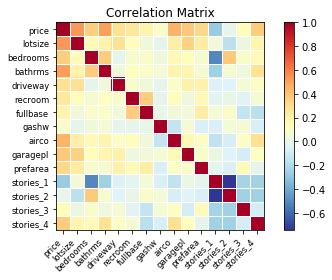

In [123]:
plt.figure(figsize=(20, 10))
sm.graphics.plot_corr(datasets_corr, xnames = list(datasets_corr))
plt.show()

In [124]:
print(datasets_corr)

              price   lotsize  bedrooms   bathrms  driveway   recroom  \
price      1.000000  0.535796  0.366447  0.516719  0.297167  0.254960   
lotsize    0.535796  1.000000  0.151851  0.193833  0.288778  0.140327   
bedrooms   0.366447  0.151851  1.000000  0.373769 -0.011996  0.080492   
bathrms    0.516719  0.193833  0.373769  1.000000  0.041955  0.126892   
driveway   0.297167  0.288778 -0.011996  0.041955  1.000000  0.091959   
recroom    0.254960  0.140327  0.080492  0.126892  0.091959  1.000000   
fullbase   0.186218  0.047487  0.097201  0.102791  0.043428  0.372434   
gashw      0.092837 -0.009201  0.046028  0.067365 -0.011942 -0.010119   
airco      0.453347  0.221765  0.160412  0.184955  0.106290  0.136626   
garagepl   0.383302  0.352872  0.139117  0.178178  0.203682  0.038122   
prefarea   0.329074  0.234782  0.078953  0.064013  0.199378  0.161292   
stories_1 -0.270058  0.054348 -0.509974 -0.250784 -0.053249 -0.022632   
stories_2 -0.002089 -0.159612  0.377424  0.080982 -

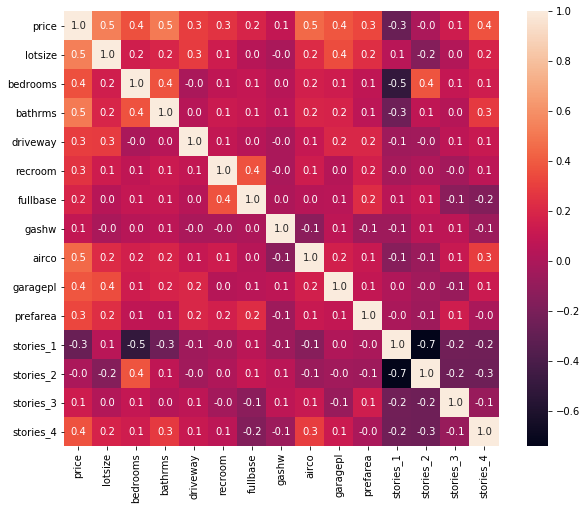

In [125]:
plt.figure(figsize=(10, 8))
sns.heatmap(datasets.corr(), vmax = 1.0, square=True, annot=True, fmt = '.1f')
plt.show()

In [126]:
independent_variables = ['lotsize', 'bedrooms', 'bathrms', 'driveway', 'recroom',
       'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea', 'stories_1',
       'stories_3', 'stories_2', 'stories_4']

In [127]:
X = datasets[independent_variables]
y = datasets['price']

In [128]:
thres = 10

for i in np.arange(0, len(independent_variables)):
    vif = [variance_inflation_factor(X[independent_variables].values, ix) for ix in range(X[independent_variables].shape[1])]
    maxloc = vif.index(max(vif))
    if max(vif) > thres:
        print("VIF(Variance Inflation Factor ) : ", vif)
        print('Droping \'' + X[independent_variables].columns[maxloc] + '\' at index : ' + str(maxloc))
        del independent_variables[maxloc]
    else:
        break
        
print("Final variables : ", independent_variables)

VIF(Variance Inflation Factor ) :  [1.3704738112004569, 1.5783268259718808, 1.2987779728705593, 1.1648811574651847, 1.2148620093192928, 1.3369114662383514, 1.053078869775805, 1.2195823546735252, 1.218832929061305, 1.181239434106175, 11.781465345739338, 3.9436985684475445, 17.220894903652624, 4.544836339845972]
Droping 'stories_2' at index : 12
VIF(Variance Inflation Factor ) :  [9.027672411240845, 12.40877864989557, 9.374682124313615, 6.79426994395169, 1.4753724454932147, 2.055797712632684, 1.1031283327561414, 1.785054332017555, 1.9607784997238862, 1.5317205065647905, 1.8969940907498246, 1.278600527923588, 1.4546157757803122]
Droping 'bedrooms' at index : 1
Final variables :  ['lotsize', 'bathrms', 'driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea', 'stories_1', 'stories_3', 'stories_4']
